In [1]:
import csv
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from sklearn.cluster import KMeans

loaded the libray and loading the datset

In [2]:
input=pd.read_csv("/Users/sheetalgolecha/Documents/practicum/dataset_diabetes/Final-11910032/final.csv")

In [49]:
input.shape

(101766, 50)

In [50]:
input[1:5]

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


Checking for null vaues.

In [51]:
for col in input.columns:
    if input[col].dtype == object:
         print(col,input[col][input[col] == '?'].count())

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


Looking for Duplicate entyr of same patient

In [52]:
input3 = input.drop_duplicates(subset= ['patient_nbr'], keep ='first')

In [11]:
input3.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [53]:
print(input3.age.value_counts())

[70-80)     18210
[60-70)     15960
[50-60)     12466
[80-90)     11589
[40-50)      6878
[30-40)      2699
[90-100)     1900
[20-30)      1127
[10-20)       535
[0-10)        154
Name: age, dtype: int64


In [54]:
for col in input3.columns:
    if input3[col].dtype == object:
         print(col,input3[col][input3[col] == '?'].count())

race 1948
gender 0
age 0
weight 68665
payer_code 31043
medical_specialty 34477
diag_1 11
diag_2 294
diag_3 1225
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [36]:
#input['gender'] = input['gender'].replace(['Male','Female'], [1,0])
result.gender.value_counts()

0    37473
1    32964
Name: gender, dtype: int64

Removing Dummy vaue row for Gender.

In [55]:
result=input3[input3['gender']!='Unknown/Invalid']

In [ ]:
result.shape

removing the row which has all null for 3 diagonisi

In [56]:
result=result[(result['diag_1'] != '?') | (result['diag_2'] !='?' )  | (result['diag_3'] !='?' )]

the coluumn citogliption and examide ave same values in all rows.

In [57]:
result=result.drop(['citoglipton', 'examide'], axis = 1)

checking for numbder of medication used by the patients

In [58]:
Med_name = ['acetohexamide','tolbutamide','troglitazone','glipizide-metformin',
            'glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone',
            'tolazamide','glyburide-metformin','insulin','miglitol','acarbose','rosiglitazone',
            'pioglitazone','glyburide','glipizide','glimepiride','metformin', 'repaglinide', 'nateglinide', 'chlorpropamide']
    
    
for i in Med_name:
    name = str(i) + 'temp'
    result[name] = result[i].apply(lambda a: 0 if (a == 'No' or a == 'Steady') else 1)
result['numchange'] = 0
for i in Med_name:
    name = str(i) + 'temp'
    result['numchange'] = result['numchange'] + result[name]
    del result[name]

In [59]:
result['numchange'].value_counts()

0    53866
1    16638
2      933
3       74
4        3
Name: numchange, dtype: int64

In [60]:
for i in Med_name:
    name = str(i) + 'temp'
    result[name] = result[i].apply(lambda a: 0 if (a == 'No' ) else 1)
result['nummed'] = 0
for col in Med_name:
    name = str(col) + 'temp'
    result['nummed'] = result['nummed'] +  result[name]
    del result[name]

removing the people who dies in the hospital and whose gender is not known.

In [61]:
result=result[result['gender']!='Unknown/Invalid']
result=result[result['discharge_disposition_id']!=11]

In [ ]:
result['admission_type_id'] = result['admission_type_id'].replace(2,1)
result['admission_type_id'] = result['admission_type_id'].replace(7,1)
result['admission_type_id'] = result['admission_type_id'].replace(6,5)
result['admission_type_id'] = result['admission_type_id'].replace(8,5)

Setting up the categorical data in a binary way.

In [63]:

result['race_Caucasian']=result['race']
result['race_AfricanAmerican']=result['race']
result['race_Other']=result['race']
result['race_Asian']=result['race']
result['race_Hispanic']=result['race']

result['race_Caucasian'][result['race_Caucasian']!='Caucasian']=0
result['race_AfricanAmerican'][result['race_AfricanAmerican']!='AfricanAmerican']=0
result['race_Other'][result['race_Other']!='Other']=0
result['race_Asian'][result['race_Asian']!='Asian']=0
result['race_Hispanic'][result['race_Hispanic']!='Hispanic']=0

result['race_Caucasian'][result['race_Caucasian']!=0]=1
result['race_AfricanAmerican'][result['race_AfricanAmerican']!=0]=1
result['race_Other'][result['race_Other']!=0]=1
result['race_Asian'][result['race_Asian']!=0]=1
result['race_Hispanic'][result['race_Hispanic']!=0]=1



result['change'] = result['change'].replace(['Ch','No'], [1,0])

result['gender'] = result['gender'].replace(['Male','Female'] ,[1,0])

result['diabetesMed'] = result['diabetesMed'].replace(['Yes','No'], [1,0])


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCop

In [64]:
 for i in Med_name:
    result[i] = result[i].replace('No', 0)
    result[i] = result[i].replace('Steady', 1)
    result[i] = result[i].replace('Up', 1)
    result[i] = result[i].replace('Down', 1)

In [65]:
result['A1Cresult'] = result['A1Cresult'].replace('>7', 1)
result['A1Cresult'] = result['A1Cresult'].replace('>8', 1)
result['A1Cresult'] = result['A1Cresult'].replace('Norm', 0)
result['A1Cresult'] = result['A1Cresult'].replace('None', -99)
result['max_glu_serum'] = result['max_glu_serum'].replace('>200', 1)
result['max_glu_serum'] = result['max_glu_serum'].replace('>300', 1)
result['max_glu_serum'] = result['max_glu_serum'].replace('Norm', 0)
result['max_glu_serum'] = result['max_glu_serum'].replace('None', -99)

In [66]:
result['readmitted'] = result['readmitted'].replace('>30', 0)
result['readmitted'] = result['readmitted'].replace('<30', 1)
result['readmitted'] = result['readmitted'].replace('NO', 0)

In [67]:
dict_age = {'[0-10)':5, '[10-20)':15, '[20-30)':25, '[30-40)':35, '[40-50)':45, '[50-60)':55, '[60-70)':65, '[70-80)':75, '[80-90)':85, '[90-100)':95}
result['age'] = result.age.map(dict_age)
result['age'] = result['age'].astype('int64')

In [80]:
result.to_csv('final.csv')

In [82]:
x=result.dtypes
x.to_csv('x.csv')

In [ ]:
result.medical_specialty.unique()

In [ ]:
input=pd.read_csv("/Users/sheetalgolecha/Documents/practicum/dataset_diabetes/final.csv")

In [68]:
for col in input.columns:
    if input[col].dtype == object:
         print(col,input[col][input[col] == '?'].count())

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [ ]:
input.shape

In [69]:
result=result.drop(['medical_specialty','payer_code'],axis=1)

In [ ]:
input.to_csv('final.csv')

In [70]:
result=result.drop(['weight','race'],axis=1)

In [71]:
result['diag1_level']=result['diag_1']

In [72]:
result['diag1_level'][result['diag_1'].str.contains('V')]=1
result['diag1_level'][result['diag_1'].str.contains('E')]=2
#input.loc[input['diag1_level'].str.contains('E'), ['diag1_level']] = 2

result['diag1_level'][result['diag_1']=='?']=-1

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [73]:
result['diag1_level']=result['diag1_level'].astype(float)

In [74]:
result['diag1_level'][(result['diag1_level']>=1.00) & (result['diag1_level']<=139.00)]=3
result['diag1_level'][(result['diag1_level']>=140.00) & (result['diag1_level']<=239.00)]=4
result['diag1_level'][(result['diag1_level']>=240.00) & (result['diag1_level']<=289.00)]=5
result['diag1_level'][(result['diag1_level']>=280.00) & (result['diag1_level']<=319.00)]=6
result['diag1_level'][(result['diag1_level']>=290.00) & (result['diag1_level']<=389.00)]=7
result['diag1_level'][(result['diag1_level']>=390.00) & (result['diag1_level']<=459.00)]=8
result['diag1_level'][(result['diag1_level']>=460.00) & (result['diag1_level']<=519.00)]=9
result['diag1_level'][(result['diag1_level']>=520.00) & (result['diag1_level']<=579.00)]=10
result['diag1_level'][(result['diag1_level']>=580.00) & (result['diag1_level']<=629.00)]=11
result['diag1_level'][(result['diag1_level']>=630.00) & (result['diag1_level']<=679.00)]=12
result['diag1_level'][(result['diag1_level']>=680.00) & (result['diag1_level']<=709.00)]=13
result['diag1_level'][(result['diag1_level']>=710.00) & (result['diag1_level']<=739.00)]=14
result['diag1_level'][(result['diag1_level']>=740.00) & (result['diag1_level']<=759.00)]=15
result['diag1_level'][(result['diag1_level']>=760.00) & (result['diag1_level']<=779.00)]=16
result['diag1_level'][(result['diag1_level']>=780.00) & (result['diag1_level']<=799.00)]=17
result['diag1_level'][(result['diag1_level']>=800.00) & (result['diag1_level']<=999.00)]=18

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-p

In [75]:
result['diag2_level']=result['diag_2']
result['diag2_level'][result['diag_2'].str.contains('V')]=1
result['diag2_level'][result['diag_2'].str.contains('E')]=2
#result.loc[result['diag2_level'].str.contains('E'), ['diag2_level']] = 2

result['diag2_level'][result['diag_2']=='?']=-1

result['diag2_level']=result['diag2_level'].astype(float)

result['diag2_level'][(result['diag2_level']>=1.00) & (result['diag2_level']<=139.00)]=3
result['diag2_level'][(result['diag2_level']>=140.00) & (result['diag2_level']<=239.00)]=4
result['diag2_level'][(result['diag2_level']>=240.00) & (result['diag2_level']<=289.00)]=5
result['diag2_level'][(result['diag2_level']>=280.00) & (result['diag2_level']<=319.00)]=6
result['diag2_level'][(result['diag2_level']>=290.00) & (result['diag2_level']<=389.00)]=7
result['diag2_level'][(result['diag2_level']>=390.00) & (result['diag2_level']<=459.00)]=8
result['diag2_level'][(result['diag2_level']>=460.00) & (result['diag2_level']<=519.00)]=9
result['diag2_level'][(result['diag2_level']>=520.00) & (result['diag2_level']<=579.00)]=10
result['diag2_level'][(result['diag2_level']>=580.00) & (result['diag2_level']<=629.00)]=11
result['diag2_level'][(result['diag2_level']>=630.00) & (result['diag2_level']<=679.00)]=12
result['diag2_level'][(result['diag2_level']>=680.00) & (result['diag2_level']<=709.00)]=13
result['diag2_level'][(result['diag2_level']>=710.00) & (result['diag2_level']<=739.00)]=14
result['diag2_level'][(result['diag2_level']>=740.00) & (result['diag2_level']<=759.00)]=15
result['diag2_level'][(result['diag2_level']>=760.00) & (result['diag2_level']<=779.00)]=16
result['diag2_level'][(result['diag2_level']>=780.00) & (result['diag2_level']<=799.00)]=17
result['diag2_level'][(result['diag2_level']>=800.00) & (result['diag2_level']<=999.00)]=18

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCo

In [76]:
result['diag3_level']=result['diag_3']
result['diag3_level'][result['diag_3'].str.contains('V')]=1
result['diag3_level'][result['diag_3'].str.contains('E')]=2
#result.loc[result['diag3_level'].str.contains('E'), ['diag3_level']] = 2

result['diag3_level'][result['diag_3']=='?']=-1

result['diag3_level']=result['diag3_level'].astype(float)

result['diag3_level'][(result['diag3_level']>=1.00) & (result['diag3_level']<=139.00)]=3
result['diag3_level'][(result['diag3_level']>=140.00) & (result['diag3_level']<=239.00)]=4
result['diag3_level'][(result['diag3_level']>=240.00) & (result['diag3_level']<=289.00)]=5
result['diag3_level'][(result['diag3_level']>=280.00) & (result['diag3_level']<=319.00)]=6
result['diag3_level'][(result['diag3_level']>=290.00) & (result['diag3_level']<=389.00)]=7
result['diag3_level'][(result['diag3_level']>=390.00) & (result['diag3_level']<=459.00)]=8
result['diag3_level'][(result['diag3_level']>=460.00) & (result['diag3_level']<=519.00)]=9
result['diag3_level'][(result['diag3_level']>=520.00) & (result['diag3_level']<=579.00)]=10
result['diag3_level'][(result['diag3_level']>=580.00) & (result['diag3_level']<=629.00)]=11
result['diag3_level'][(result['diag3_level']>=630.00) & (result['diag3_level']<=679.00)]=12
result['diag3_level'][(result['diag3_level']>=680.00) & (result['diag3_level']<=709.00)]=13
result['diag3_level'][(result['diag3_level']>=710.00) & (result['diag3_level']<=739.00)]=14
result['diag3_level'][(result['diag3_level']>=740.00) & (result['diag3_level']<=759.00)]=15
result['diag3_level'][(result['diag3_level']>=760.00) & (result['diag3_level']<=779.00)]=16
result['diag3_level'][(result['diag3_level']>=780.00) & (result['diag3_level']<=799.00)]=17
result['diag3_level'][(result['diag3_level']>=800.00) & (result['diag3_level']<=999.00)]=18

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCo

In [77]:
result=result.drop(['diag_1','diag_2','diag_3'],axis=1)

In [ ]:
input.to_csv('final.csv')

In [77]:
result.dtypes

encounter_id            int64
patient_nbr             int64
race                   object
gender                  int64
age                     int64
weight                 object
time_in_hospital        int64
num_lab_procedures      int64
num_procedures          int64
num_medications         int64
number_outpatient       int64
number_emergency        int64
number_inpatient        int64
number_diagnoses        int64
max_glu_serum           int64
A1Cresult               int64
metformin               int64
repaglinide             int64
nateglinide             int64
chlorpropamide          int64
glimepiride             int64
acetohexamide           int64
glipizide               int64
glyburide               int64
tolbutamide             int64
pioglitazone            int64
rosiglitazone           int64
acarbose                int64
miglitol                int64
troglitazone            int64
                       ...   
diag2_level_9         float64
diag2_level_10        float64
diag2_leve

In [78]:
result['admission_source_id_7']=result['admission_source_id']
result['admission_source_id_1']=result['admission_source_id']
result['admission_source_id_2']=result['admission_source_id']
result['admission_source_id_4']=result['admission_source_id']
result['admission_source_id_5']=result['admission_source_id']
result['admission_source_id_20']=result['admission_source_id']
result['admission_source_id_17']=result['admission_source_id']
result['admission_source_id_3']=result['admission_source_id']
result['admission_source_id_6']=result['admission_source_id']
result['admission_source_id_8']=result['admission_source_id']
result['admission_source_id_9']=result['admission_source_id']
result['admission_source_id_10']=result['admission_source_id']
result['admission_source_id_22']=result['admission_source_id']
result['admission_source_id_14']=result['admission_source_id']
result['admission_source_id_11']=result['admission_source_id']
result['admission_source_id_25']=result['admission_source_id']
result['admission_source_id_13']=result['admission_source_id']

result['admission_source_id_7'][result['admission_source_id_7']!=7]=0
result['admission_source_id_1'][result['admission_source_id_1']!=1]=0
result['admission_source_id_2'][result['admission_source_id_2']!=2]=0
result['admission_source_id_4'][result['admission_source_id_4']!=4]=0
result['admission_source_id_5'][result['admission_source_id_5']!=5]=0
result['admission_source_id_20'][result['admission_source_id_20']!=20]=0
result['admission_source_id_17'][result['admission_source_id_17']!=17]=0
result['admission_source_id_3'][result['admission_source_id_3']!=3]=0
result['admission_source_id_6'][result['admission_source_id_6']!=6]=0
result['admission_source_id_8'][result['admission_source_id_8']!=8]=0
result['admission_source_id_9'][result['admission_source_id_9']!=9]=0
result['admission_source_id_10'][result['admission_source_id_10']!=10]=0
result['admission_source_id_22'][result['admission_source_id_22']!=22]=0
result['admission_source_id_14'][result['admission_source_id_14']!=14]=0
result['admission_source_id_11'][result['admission_source_id_11']!=11]=0
result['admission_source_id_25'][result['admission_source_id_25']!=25]=0
result['admission_source_id_13'][result['admission_source_id_13']!=13]=0

result['admission_source_id_7'][result['admission_source_id_7']==7]=1
result['admission_source_id_1'][result['admission_source_id_1']==1]=1
result['admission_source_id_2'][result['admission_source_id_2']==2]=1
result['admission_source_id_4'][result['admission_source_id_4']==4]=1
result['admission_source_id_5'][result['admission_source_id_5']==5]=1
result['admission_source_id_20'][result['admission_source_id_20']==20]=1
result['admission_source_id_17'][result['admission_source_id_17']==17]=1
result['admission_source_id_3'][result['admission_source_id_3']==3]=1
result['admission_source_id_6'][result['admission_source_id_6']==6]=1
result['admission_source_id_8'][result['admission_source_id_8']==8]=1
result['admission_source_id_9'][result['admission_source_id_9']==9]=1
result['admission_source_id_10'][result['admission_source_id_10']==10]=1
result['admission_source_id_22'][result['admission_source_id_22']==22]=1
result['admission_source_id_14'][result['admission_source_id_14']==14]=1
result['admission_source_id_11'][result['admission_source_id_11']==11]=1
result['admission_source_id_25'][result['admission_source_id_25']==25]=1
result['admission_source_id_13'][result['admission_source_id_13']==13]=1

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

In [79]:
input['discharge_disposition_id'].unique()

array([25,  1,  3,  6,  2,  5, 11,  7, 10,  4, 14, 18,  8, 13, 12, 16, 17,
       22, 23,  9, 20, 15, 24, 28, 19, 27])

In [80]:

result['discharge_disposition_id_3']=result['discharge_disposition_id']
result['discharge_disposition_id_1']=result['discharge_disposition_id']
result['discharge_disposition_id_6']=result['discharge_disposition_id']
result['discharge_disposition_id_5']=result['discharge_disposition_id']
result['discharge_disposition_id_7']=result['discharge_disposition_id']
result['discharge_disposition_id_25']=result['discharge_disposition_id']
result['discharge_disposition_id_2']=result['discharge_disposition_id']
result['discharge_disposition_id_4']=result['discharge_disposition_id']
result['discharge_disposition_id_8']=result['discharge_disposition_id']
result['discharge_disposition_id_14']=result['discharge_disposition_id']
result['discharge_disposition_id_18']=result['discharge_disposition_id']
result['discharge_disposition_id_12']=result['discharge_disposition_id']
result['discharge_disposition_id_17']=result['discharge_disposition_id']
result['discharge_disposition_id_16']=result['discharge_disposition_id']
result['discharge_disposition_id_22']=result['discharge_disposition_id']
result['discharge_disposition_id_23']=result['discharge_disposition_id']
result['discharge_disposition_id_15']=result['discharge_disposition_id']
result['discharge_disposition_id_13']=result['discharge_disposition_id']
result['discharge_disposition_id_28']=result['discharge_disposition_id']
result['discharge_disposition_id_9']=result['discharge_disposition_id']
result['discharge_disposition_id_24']=result['discharge_disposition_id']
result['discharge_disposition_id_10']=result['discharge_disposition_id']
result['discharge_disposition_id_20']=result['discharge_disposition_id']
result['discharge_disposition_id_19']=result['discharge_disposition_id']
result['discharge_disposition_id_27']=result['discharge_disposition_id']





result['discharge_disposition_id_3'][result['discharge_disposition_id_3']!=3]=0
result['discharge_disposition_id_1'][result['discharge_disposition_id_1']!=1]=0
result['discharge_disposition_id_6'][result['discharge_disposition_id_6']!=6]=0
result['discharge_disposition_id_5'][result['discharge_disposition_id_5']!=5]=0
result['discharge_disposition_id_7'][result['discharge_disposition_id_7']!=7]=0
result['discharge_disposition_id_25'][result['discharge_disposition_id_25']!=25]=0
result['discharge_disposition_id_2'][result['discharge_disposition_id_2']!=2]=0
result['discharge_disposition_id_4'][result['discharge_disposition_id_4']!=4]=0
result['discharge_disposition_id_8'][result['discharge_disposition_id_8']!=8]=0
result['discharge_disposition_id_14'][result['discharge_disposition_id_14']!=14]=0
result['discharge_disposition_id_18'][result['discharge_disposition_id_18']!=18]=0
result['discharge_disposition_id_12'][result['discharge_disposition_id_12']!=12]=0
result['discharge_disposition_id_17'][result['discharge_disposition_id_17']!=17]=0
result['discharge_disposition_id_16'][result['discharge_disposition_id_16']!=16]=0
result['discharge_disposition_id_22'][result['discharge_disposition_id_22']!=22]=0
result['discharge_disposition_id_23'][result['discharge_disposition_id_23']!=23]=0
result['discharge_disposition_id_15'][result['discharge_disposition_id_15']!=15]=0
result['discharge_disposition_id_13'][result['discharge_disposition_id_13']!=13]=0
result['discharge_disposition_id_28'][result['discharge_disposition_id_28']!=28]=0
result['discharge_disposition_id_9'][result['discharge_disposition_id_9']!=9]=0
result['discharge_disposition_id_24'][result['discharge_disposition_id_24']!=24]=0
result['discharge_disposition_id_10'][result['discharge_disposition_id_10']!=10]=0
result['discharge_disposition_id_20'][result['discharge_disposition_id_20']!=20]=0
result['discharge_disposition_id_19'][result['discharge_disposition_id_19']!=19]=0
result['discharge_disposition_id_27'][result['discharge_disposition_id_27']!=27]=0




result['discharge_disposition_id_3'][result['discharge_disposition_id_3']==3]=1
result['discharge_disposition_id_1'][result['discharge_disposition_id_1']==1]=1
result['discharge_disposition_id_6'][result['discharge_disposition_id_6']==6]=1
result['discharge_disposition_id_5'][result['discharge_disposition_id_5']==5]=1
result['discharge_disposition_id_7'][result['discharge_disposition_id_7']==7]=1
result['discharge_disposition_id_25'][result['discharge_disposition_id_25']==25]=1
result['discharge_disposition_id_2'][result['discharge_disposition_id_2']==2]=1
result['discharge_disposition_id_4'][result['discharge_disposition_id_4']==4]=1
result['discharge_disposition_id_8'][result['discharge_disposition_id_8']==8]=1
result['discharge_disposition_id_14'][result['discharge_disposition_id_14']==14]=1
result['discharge_disposition_id_18'][result['discharge_disposition_id_18']==18]=1
result['discharge_disposition_id_12'][result['discharge_disposition_id_12']==12]=1
result['discharge_disposition_id_17'][result['discharge_disposition_id_17']==17]=1
result['discharge_disposition_id_16'][result['discharge_disposition_id_16']==16]=1
result['discharge_disposition_id_22'][result['discharge_disposition_id_22']==22]=1
result['discharge_disposition_id_23'][result['discharge_disposition_id_23']==23]=1
result['discharge_disposition_id_15'][result['discharge_disposition_id_15']==15]=1
result['discharge_disposition_id_13'][result['discharge_disposition_id_13']==13]=1
result['discharge_disposition_id_28'][result['discharge_disposition_id_28']==28]=1
result['discharge_disposition_id_9'][result['discharge_disposition_id_9']==9]=1
result['discharge_disposition_id_24'][result['discharge_disposition_id_24']==24]=1
result['discharge_disposition_id_10'][result['discharge_disposition_id_10']==10]=1
result['discharge_disposition_id_20'][result['discharge_disposition_id_20']==20]=1
result['discharge_disposition_id_19'][result['discharge_disposition_id_19']==19]=1
result['discharge_disposition_id_27'][result['discharge_disposition_id_27']==27]=1




/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

In [81]:
input['admission_type_id'].unique()

array([6, 1, 2, 3, 4, 5, 8, 7])

In [82]:
result['admission_type_id_1']=result['admission_type_id']
result['admission_type_id_3']=result['admission_type_id']
result['admission_type_id_5']=result['admission_type_id']
result['admission_type_id_4']=result['admission_type_id']

result['admission_type_id_1'][result['admission_type_id_1']!=1]=0
result['admission_type_id_3'][result['admission_type_id_3']!=3]=0
result['admission_type_id_5'][result['admission_type_id_5']!=5]=0
result['admission_type_id_4'][result['admission_type_id_4']!=4]=0


result['admission_type_id_1'][result['admission_type_id_1']==1]=1
result['admission_type_id_3'][result['admission_type_id_3']==3]=1
result['admission_type_id_5'][result['admission_type_id_5']==5]=1
result['admission_type_id_4'][result['admission_type_id_4']==4]=1

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [74]:
result.to_csv("final.csv")

In [83]:
result['service_utilization'] = result['number_outpatient'] + result['number_emergency'] + result['number_inpatient']

In [84]:
result=result.drop(['admission_source_id', 'admission_type_id','discharge_disposition_id'], axis = 1)

In [18]:
result.dtypes

Unnamed: 0                     int64
Unnamed: 0.1                   int64
encounter_id                   int64
patient_nbr                    int64
gender                         int64
age                            int64
time_in_hospital               int64
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
number_outpatient              int64
number_emergency               int64
number_inpatient               int64
number_diagnoses               int64
max_glu_serum                  int64
A1Cresult                      int64
metformin                      int64
repaglinide                    int64
nateglinide                    int64
chlorpropamide                 int64
glimepiride                    int64
acetohexamide                  int64
glipizide                      int64
glyburide                      int64
tolbutamide                    int64
pioglitazone                   int64
rosiglitazone                  int64
a

In [40]:
result=pd.read_csv("/Users/sheetalgolecha/Documents/practicum/dataset_diabetes/final.csv")

In [85]:

result['diag3_level_1']=result['diag3_level']
result['diag3_level_2']=result['diag3_level']
result['diag3_level_3']=result['diag3_level']
result['diag3_level_4']=result['diag3_level']
result['diag3_level_5']=result['diag3_level']
result['diag3_level_6']=result['diag3_level']
result['diag3_level_7']=result['diag3_level']
result['diag3_level_8']=result['diag3_level']
result['diag3_level_9']=result['diag3_level']
result['diag3_level_10']=result['diag3_level']
result['diag3_level_11']=result['diag3_level']
result['diag3_level_12']=result['diag3_level']
result['diag3_level_13']=result['diag3_level']
result['diag3_level_14']=result['diag3_level']
result['diag3_level_15']=result['diag3_level']
result['diag3_level_16']=result['diag3_level']
result['diag3_level_17']=result['diag3_level']
result['diag3_level_18']=result['diag3_level']
result['diag3_level_19']=result['diag3_level']





In [86]:

result['diag3_level_1'][result['diag3_level_1']!=1]=0
result['diag3_level_2'][result['diag3_level_2']!=2]=0
result['diag3_level_3'][result['diag3_level_3']!=3]=0
result['diag3_level_4'][result['diag3_level_4']!=4]=0
result['diag3_level_5'][result['diag3_level_5']!=5]=0
result['diag3_level_6'][result['diag3_level_6']!=6]=0
result['diag3_level_7'][result['diag3_level_7']!=7]=0
result['diag3_level_8'][result['diag3_level_8']!=8]=0
result['diag3_level_9'][result['diag3_level_9']!=9]=0
result['diag3_level_10'][result['diag3_level_10']!=10]=0
result['diag3_level_11'][result['diag3_level_11']!=11]=0
result['diag3_level_12'][result['diag3_level_12']!=12]=0
result['diag3_level_13'][result['diag3_level_13']!=13]=0
result['diag3_level_14'][result['diag3_level_14']!=14]=0
result['diag3_level_15'][result['diag3_level_15']!=15]=0
result['diag3_level_16'][result['diag3_level_16']!=16]=0
result['diag3_level_17'][result['diag3_level_17']!=17]=0
result['diag3_level_18'][result['diag3_level_18']!=18]=0
result['diag3_level_19'][result['diag3_level_19']!=19]=0


result['diag3_level_1'][result['diag3_level_1']==1]=1
result['diag3_level_2'][result['diag3_level_2']==2]=1
result['diag3_level_3'][result['diag3_level_3']==3]=1
result['diag3_level_4'][result['diag3_level_4']==4]=1
result['diag3_level_5'][result['diag3_level_5']==5]=1
result['diag3_level_6'][result['diag3_level_6']==6]=1
result['diag3_level_7'][result['diag3_level_7']==7]=1
result['diag3_level_8'][result['diag3_level_8']==8]=1
result['diag3_level_9'][result['diag3_level_9']==9]=1
result['diag3_level_10'][result['diag3_level_10']==10]=1
result['diag3_level_11'][result['diag3_level_11']==11]=1
result['diag3_level_12'][result['diag3_level_12']==12]=1
result['diag3_level_13'][result['diag3_level_13']==13]=1
result['diag3_level_14'][result['diag3_level_14']==14]=1
result['diag3_level_15'][result['diag3_level_15']==15]=1
result['diag3_level_16'][result['diag3_level_16']==16]=1
result['diag3_level_17'][result['diag3_level_17']==17]=1
result['diag3_level_18'][result['diag3_level_18']==18]=1
result['diag3_level_19'][result['diag3_level_19']==19]=1



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ip

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

In [87]:

result['diag2_level_1']=result['diag2_level']
result['diag2_level_2']=result['diag2_level']
result['diag2_level_3']=result['diag2_level']
result['diag2_level_4']=result['diag2_level']
result['diag2_level_5']=result['diag2_level']
result['diag2_level_6']=result['diag2_level']
result['diag2_level_7']=result['diag2_level']
result['diag2_level_8']=result['diag2_level']
result['diag2_level_9']=result['diag2_level']
result['diag2_level_10']=result['diag2_level']
result['diag2_level_11']=result['diag2_level']
result['diag2_level_12']=result['diag2_level']
result['diag2_level_13']=result['diag2_level']
result['diag2_level_14']=result['diag2_level']
result['diag2_level_15']=result['diag2_level']
result['diag2_level_16']=result['diag2_level']
result['diag2_level_17']=result['diag2_level']
result['diag2_level_18']=result['diag2_level']
result['diag2_level_19']=result['diag2_level']


result['diag2_level_1'][result['diag2_level_1']!=1]=0
result['diag2_level_2'][result['diag2_level_2']!=2]=0
result['diag2_level_3'][result['diag2_level_3']!=3]=0
result['diag2_level_4'][result['diag2_level_4']!=4]=0
result['diag2_level_5'][result['diag2_level_5']!=5]=0
result['diag2_level_6'][result['diag2_level_6']!=6]=0
result['diag2_level_7'][result['diag2_level_7']!=7]=0
result['diag2_level_8'][result['diag2_level_8']!=8]=0
result['diag2_level_9'][result['diag2_level_9']!=9]=0
result['diag2_level_10'][result['diag2_level_10']!=10]=0
result['diag2_level_11'][result['diag2_level_11']!=11]=0
result['diag2_level_12'][result['diag2_level_12']!=12]=0
result['diag2_level_13'][result['diag2_level_13']!=13]=0
result['diag2_level_14'][result['diag2_level_14']!=14]=0
result['diag2_level_15'][result['diag2_level_15']!=15]=0
result['diag2_level_16'][result['diag2_level_16']!=16]=0
result['diag2_level_17'][result['diag2_level_17']!=17]=0
result['diag2_level_18'][result['diag2_level_18']!=18]=0
result['diag2_level_19'][result['diag2_level_19']!=19]=0


result['diag2_level_1'][result['diag2_level_1']==1]=1
result['diag2_level_2'][result['diag2_level_2']==2]=1
result['diag2_level_3'][result['diag2_level_3']==3]=1
result['diag2_level_4'][result['diag2_level_4']==4]=1
result['diag2_level_5'][result['diag2_level_5']==5]=1
result['diag2_level_6'][result['diag2_level_6']==6]=1
result['diag2_level_7'][result['diag2_level_7']==7]=1
result['diag2_level_8'][result['diag2_level_8']==8]=1
result['diag2_level_9'][result['diag2_level_9']==9]=1
result['diag2_level_10'][result['diag2_level_10']==10]=1
result['diag2_level_11'][result['diag2_level_11']==11]=1
result['diag2_level_12'][result['diag2_level_12']==12]=1
result['diag2_level_13'][result['diag2_level_13']==13]=1
result['diag2_level_14'][result['diag2_level_14']==14]=1
result['diag2_level_15'][result['diag2_level_15']==15]=1
result['diag2_level_16'][result['diag2_level_16']==16]=1
result['diag2_level_17'][result['diag2_level_17']==17]=1
result['diag2_level_18'][result['diag2_level_18']==18]=1
result['diag2_level_19'][result['diag2_level_19']==19]=1



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

In [88]:

result['diag1_level_1']=result['diag1_level']
result['diag1_level_2']=result['diag1_level']
result['diag1_level_3']=result['diag1_level']
result['diag1_level_4']=result['diag1_level']
result['diag1_level_5']=result['diag1_level']
result['diag1_level_6']=result['diag1_level']
result['diag1_level_7']=result['diag1_level']
result['diag1_level_8']=result['diag1_level']
result['diag1_level_9']=result['diag1_level']
result['diag1_level_10']=result['diag1_level']
result['diag1_level_11']=result['diag1_level']
result['diag1_level_12']=result['diag1_level']
result['diag1_level_13']=result['diag1_level']
result['diag1_level_14']=result['diag1_level']
result['diag1_level_15']=result['diag1_level']
result['diag1_level_16']=result['diag1_level']
result['diag1_level_17']=result['diag1_level']
result['diag1_level_18']=result['diag1_level']
result['diag1_level_19']=result['diag1_level']


result['diag1_level_1'][result['diag1_level_1']!=1]=0
result['diag1_level_2'][result['diag1_level_2']!=2]=0
result['diag1_level_3'][result['diag1_level_3']!=3]=0
result['diag1_level_4'][result['diag1_level_4']!=4]=0
result['diag1_level_5'][result['diag1_level_5']!=5]=0
result['diag1_level_6'][result['diag1_level_6']!=6]=0
result['diag1_level_7'][result['diag1_level_7']!=7]=0
result['diag1_level_8'][result['diag1_level_8']!=8]=0
result['diag1_level_9'][result['diag1_level_9']!=9]=0
result['diag1_level_10'][result['diag1_level_10']!=10]=0
result['diag1_level_11'][result['diag1_level_11']!=11]=0
result['diag1_level_12'][result['diag1_level_12']!=12]=0
result['diag1_level_13'][result['diag1_level_13']!=13]=0
result['diag1_level_14'][result['diag1_level_14']!=14]=0
result['diag1_level_15'][result['diag1_level_15']!=15]=0
result['diag1_level_16'][result['diag1_level_16']!=16]=0
result['diag1_level_17'][result['diag1_level_17']!=17]=0
result['diag1_level_18'][result['diag1_level_18']!=18]=0
result['diag1_level_19'][result['diag1_level_19']!=19]=0


result['diag1_level_1'][result['diag1_level_1']==1]=1
result['diag1_level_2'][result['diag1_level_2']==2]=1
result['diag1_level_3'][result['diag1_level_3']==3]=1
result['diag1_level_4'][result['diag1_level_4']==4]=1
result['diag1_level_5'][result['diag1_level_5']==5]=1
result['diag1_level_6'][result['diag1_level_6']==6]=1
result['diag1_level_7'][result['diag1_level_7']==7]=1
result['diag1_level_8'][result['diag1_level_8']==8]=1
result['diag1_level_9'][result['diag1_level_9']==9]=1
result['diag1_level_10'][result['diag1_level_10']==10]=1
result['diag1_level_11'][result['diag1_level_11']==11]=1
result['diag1_level_12'][result['diag1_level_12']==12]=1
result['diag1_level_13'][result['diag1_level_13']==13]=1
result['diag1_level_14'][result['diag1_level_14']==14]=1
result['diag1_level_15'][result['diag1_level_15']==15]=1
result['diag1_level_16'][result['diag1_level_16']==16]=1
result['diag1_level_17'][result['diag1_level_17']==17]=1
result['diag1_level_18'][result['diag1_level_18']==18]=1
result['diag1_level_19'][result['diag1_level_19']==19]=1



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

In [89]:
 result['race_Caucasian'] = result['race_Caucasian'].astype('int64')
 result['race_AfricanAmerican'] = result['race_AfricanAmerican'].astype('int64')
 result['race_Other'] = result['race_Other'].astype('int64')
 result['race_Asian'] = result['race_Asian'].astype('int64')
 result['race_Hispanic'] = result['race_Hispanic'].astype('int64')

In [90]:
 result['diag1_level'] = result['diag1_level'].astype('int64')
 result['diag2_level'] = result['diag2_level'].astype('int64')
 result['diag3_level'] = result['diag3_level'].astype('int64')
 result['diag3_level_1'] = result['diag3_level_1'].astype('int64')
 result['diag3_level_2'] = result['diag3_level_2'].astype('int64')
 result['diag3_level_3'] = result['diag3_level_3'].astype('int64')
 result['diag3_level_4'] = result['diag3_level_4'].astype('int64')
 result['diag3_level_5'] = result['diag3_level_5'].astype('int64')
 result['diag3_level_6'] = result['diag3_level_6'].astype('int64')
 result['diag3_level_7'] = result['diag3_level_7'].astype('int64')
 result['diag3_level_8'] = result['diag3_level_8'].astype('int64')
 result['diag3_level_9'] = result['diag3_level_9'].astype('int64')
 result['diag3_level_10'] = result['diag3_level_10'].astype('int64')
 result['diag3_level_11'] = result['diag3_level_11'].astype('int64')
 result['diag3_level_12'] = result['diag3_level_12'].astype('int64')
 result['diag3_level_13'] = result['diag3_level_13'].astype('int64')
 result['diag3_level_14'] = result['diag3_level_14'].astype('int64')
 result['diag3_level_15'] = result['diag3_level_15'].astype('int64')
 result['diag3_level_16'] = result['diag3_level_16'].astype('int64')
 result['diag3_level_17'] = result['diag3_level_17'].astype('int64')
 result['diag3_level_18'] = result['diag3_level_18'].astype('int64')
 result['diag3_level_19'] = result['diag3_level_19'].astype('int64')
 result['diag2_level_1'] = result['diag2_level_1'].astype('int64')
 result['diag2_level_2'] = result['diag2_level_2'].astype('int64')
 result['diag2_level_3'] = result['diag2_level_3'].astype('int64')
 result['diag2_level_4'] = result['diag2_level_4'].astype('int64')
 result['diag2_level_5'] = result['diag2_level_5'].astype('int64')
 result['diag2_level_6'] = result['diag2_level_6'].astype('int64')
 result['diag2_level_7'] = result['diag2_level_7'].astype('int64')
 result['diag2_level_8'] = result['diag2_level_8'].astype('int64')
 result['diag2_level_9'] = result['diag2_level_9'].astype('int64')
 result['diag2_level_10'] = result['diag2_level_10'].astype('int64')
 result['diag2_level_11'] = result['diag2_level_11'].astype('int64')
 result['diag2_level_12'] = result['diag2_level_12'].astype('int64')
 result['diag2_level_13'] = result['diag2_level_13'].astype('int64')
 result['diag2_level_14'] = result['diag2_level_14'].astype('int64')
 result['diag2_level_15'] = result['diag2_level_15'].astype('int64')
 result['diag2_level_16'] = result['diag2_level_16'].astype('int64')
 result['diag2_level_17'] = result['diag2_level_17'].astype('int64')
 result['diag2_level_18'] = result['diag2_level_18'].astype('int64')
 result['diag2_level_19'] = result['diag2_level_19'].astype('int64')
 result['diag1_level_1'] = result['diag1_level_1'].astype('int64')
 result['diag1_level_2'] = result['diag1_level_2'].astype('int64')
 result['diag1_level_3'] = result['diag1_level_3'].astype('int64')
 result['diag1_level_4'] = result['diag1_level_4'].astype('int64')
 result['diag1_level_5'] = result['diag1_level_5'].astype('int64')
 result['diag1_level_6'] = result['diag1_level_6'].astype('int64')
 result['diag1_level_7'] = result['diag1_level_7'].astype('int64')
 result['diag1_level_8'] = result['diag1_level_8'].astype('int64')
 result['diag1_level_9'] = result['diag1_level_9'].astype('int64')
 result['diag1_level_10'] = result['diag1_level_10'].astype('int64')
 result['diag1_level_11'] = result['diag1_level_11'].astype('int64')
 result['diag1_level_12'] = result['diag1_level_12'].astype('int64')
 result['diag1_level_13'] = result['diag1_level_13'].astype('int64')
 result['diag1_level_14'] = result['diag1_level_14'].astype('int64')
 result['diag1_level_15'] = result['diag1_level_15'].astype('int64')
 result['diag1_level_16'] = result['diag1_level_16'].astype('int64')
 result['diag1_level_17'] = result['diag1_level_17'].astype('int64')
 result['diag1_level_18'] = result['diag1_level_18'].astype('int64')
 result['diag1_level_19'] = result['diag1_level_19'].astype('int64')

In [85]:
result.to_csv("final.csv")

In [91]:
result[1:5]

,encounter_id,patient_nbr,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,diag1_level_10,diag1_level_11,diag1_level_12,diag1_level_13,diag1_level_14,diag1_level_15,diag1_level_16,diag1_level_17,diag1_level_18,diag1_level_19
1,149190,55629189,0,15,3,59,0,18,0,0,...,0,0,0,0,0,0,0,0,0,0
2,64410,86047875,0,25,2,11,5,13,2,0,...,0,0,1,0,0,0,0,0,0,0
3,500364,82442376,1,35,2,44,1,16,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16680,42519267,1,45,1,51,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
input.shape

(70437, 154)

In [7]:
train=input[1:60000]
valid=input[60001:70437]

final cleaned dataset

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE

In [8]:
test=input['readmitted']

In [7]:
train=input.drop(['readmitted'],axis=1)

In [15]:
sm = SMOTE(random_state=12, ratio = 1.0)
x_res, y_res = sm.fit_sample(train, test)
print(test.value_counts())
print(np.bincount(y_res))

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


0    64144
1     6293
Name: readmitted, dtype: int64
[64144 64144]


In [16]:
x_train_res, x_val_res, y_train_res, y_val_res = train_test_split(x_res,
                                                    y_res,
                                                    test_size = .1,
                                                    random_state=12)

In [17]:
clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
clf_rf.fit(x_train_res, y_train_res)
clf_rf.score(x_val_res, y_val_res)

0.9509704575570972

Recall metric in the train dataset: 55.88505747126437%


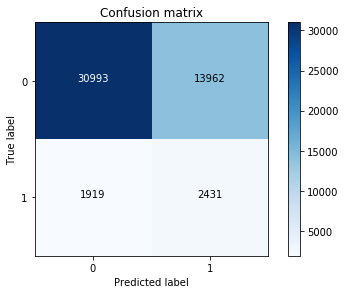

In [30]:
y_train_pre = lr1.predict(X_train)

cnf_matrix_tra = confusion_matrix(y_train, y_train_pre)

print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))


class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

Recall metric in the testing dataset: 52.44467318579516%


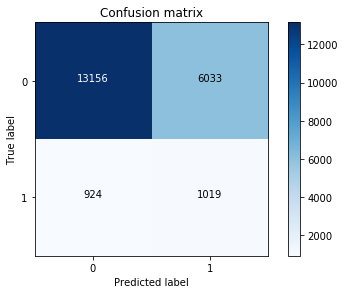

In [31]:
y_pre = lr1.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pre)

print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
#print("Precision metric in the testing dataset: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

In [ ]:
tmp = lr1.fit(X_train_res, y_train_res.ravel())

[LibLinear]

In [ ]:
y_pred_sample_score = tmp.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_sample_score)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
roc_auc